In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
filename = "oec.csv"
data = pandas.read_csv(filename)
print data.columns

Index([u'PlanetIdentifier', u'TypeFlag', u'PlanetaryMassJpt', u'RadiusJpt',
       u'PeriodDays', u'SemiMajorAxisAU', u'Eccentricity', u'PeriastronDeg',
       u'LongitudeDeg', u'AscendingNodeDeg', u'InclinationDeg',
       u'SurfaceTempK', u'AgeGyr', u'DiscoveryMethod', u'DiscoveryYear',
       u'LastUpdated', u'RightAscension', u'Declination', u'DistFromSunParsec',
       u'HostStarMassSlrMass', u'HostStarRadiusSlrRad', u'HostStarMetallicity',
       u'HostStarTempK', u'HostStarAgeGyr', u'ListsPlanetIsOn'],
      dtype='object')


In [3]:
a = data["RadiusJpt"]
a = a[a.notna()]

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   2.,
         10.,  33., 107., 259., 425., 430., 548., 300., 105.,  62.,  48.,
         78., 175., 143.,  44.,   1.,   0.,   0.,   1.]),
 array([-2.63827216, -2.52439138, -2.4105106 , -2.29662982, -2.18274904,
        -2.06886826, -1.95498748, -1.8411067 , -1.72722592, -1.61334514,
        -1.49946436, -1.38558358, -1.2717028 , -1.15782202, -1.04394124,
        -0.93006046, -0.81617968, -0.7022989 , -0.58841812, -0.47453733,
        -0.36065655, -0.24677577, -0.13289499, -0.01901421,  0.09486657,
         0.20874735,  0.32262813,  0.43650891,  0.55038969,  0.66427047,
         0.77815125]),
 <a list of 30 Patch objects>)

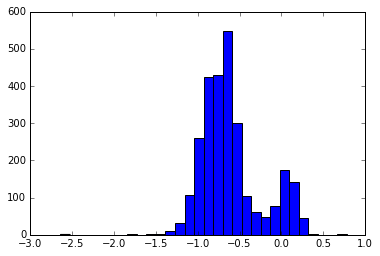

In [4]:
plt.hist(np.log10(a),bins=30)

In [5]:
print np.mean(a)

0.3711896948449642


In [6]:
from astropy.stats import bootstrap

In [7]:
from astropy.utils import NumpyRNGContext

In [8]:
test_statistic = lambda x: (np.sum(x), np.mean(x))
with NumpyRNGContext(1):
    bootresult = bootstrap(np.array(a), 1000, bootfunc=np.mean)

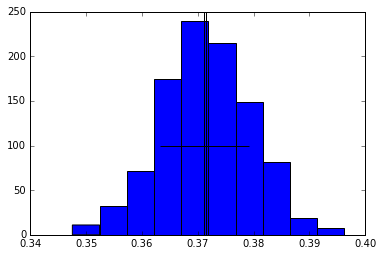

In [9]:
plt.hist(bootresult)
plt.vlines(bootresult.mean(),0.,250)
plt.vlines(a.mean(),0,250)
h1 = a.mean() - bootresult.std()
h2 = a.mean() + bootresult.std()
plt.hlines(100,h1,h2)

In [10]:
data = np.genfromtxt("../GlobClus_prop.dat",unpack=True,skip_header=1)

In [20]:
mag = data[6]
indx = ~np.isnan(mag)
mag = mag[indx]
print mag.size,np.sqrt(mag.size),mag.mean()

148 12.165525060596439 -7.027027027027027


(array([ 2., 11., 16., 26., 39., 23., 13.,  9.,  5.,  2.,  1.,  1.]),
 array([-10.4  ,  -9.675,  -8.95 ,  -8.225,  -7.5  ,  -6.775,  -6.05 ,
         -5.325,  -4.6  ,  -3.875,  -3.15 ,  -2.425,  -1.7  ]),
 <a list of 12 Patch objects>)

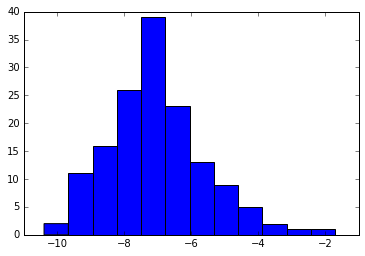

In [21]:
plt.hist(mag,bins=int(np.sqrt(mag.size)))

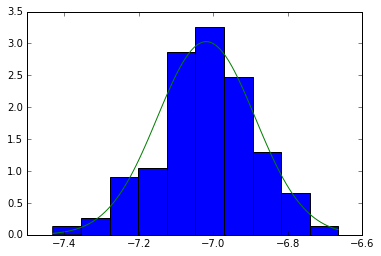

In [35]:
with NumpyRNGContext(1):
    bootresult = bootstrap(mag, 100, bootfunc=np.mean)

plt.hist(bootresult,bins=int(np.sqrt(bootresult.size)),normed=True)

x = np.linspace(bootresult.min(),bootresult.max(),100)

import scipy.stats as st
y = st.norm.pdf(x,bootresult.mean(),bootresult.std())
plt.plot(x,y)